>
# Project: Investigate No-Show Appointments datasets

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



### Dataset Description 

* PatientId - Identification of a patient
* AppointmentID - Identification of each appointment
* Gender - Male or Female
* ScheduledDay - The day of the actual appointment, when they have to visit the doctor.
* AppointmentDay - The day someone called or registered the appointment, this is before appointment of course.
* Age - How old is the patient
* Neighbourhood - Where the appointment takes place.
* Scholarship - True of False, depending on if the patient is on Bolsa Família scholarship, refer to https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia for more info.
* Hipertension - True or False, depending on if the patient is hypertensive.
* Diabetes - True or False, dependinhg on if the patient is diabetic. 
* Alcoholism - True or False, depending on if the patient is an alcoholic.
* Handcap - True or False, depending on if the patient is less-privilege.
* SMS_received - 1 or more messages sent to the patient tag as 1, no message sent tag as 0.
* No_show - True or False, depending on if the patient showed up (No) for the appointment or not (Yes).





### Question(s) for Analysis

1. Are more females on the scholarship compared to males?
2. Is being on the scholarship a key predictor of patients showing up for appointments?
3. Does a particlar gender turn up for appointment more than the other? by how much?
4. Does a particular age demographic show up for appointment more compared to others?
5. what age demographic have the most scholarship grant?  
6. Are males more prone to health issues than females?***

### Importing necessary libraries for analysis

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import warnings

%matplotlib inline
pd.set_option ('display.max_columns', None)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = FutureWarning)

<a id='wrangling'></a>
## Data Wrangling


In [258]:
df = pd.read_csv("no_show_appointments.csv") #loading dataset

In [259]:
df.head() # checking few lines in the dataset

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Some columns name appears to have been mispelled e.g Handcap instead of Handicap, this would handled in the data cleaning section of this report.

In [260]:
df.shape #checking the number of rows and columns in the dataframe

(110527, 14)

The data above indicates that the dataset contains 110527 rows and 14 columns.

In [261]:
df.info() #checking dataframe information e.g columns' names and indices, data types, number of not null values etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


it appears several columns have inaccurate dtypes (data type) 
e.g ScheduledDay and AppointmentDay should be in datetime format i.e dtypes = datetime. This would be handled in the data cleaning secton of this report.

In [262]:
df.isnull().sum() # checking for null values in the dataframe

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The above data indicate that there are no null values in the dataset

In [263]:
df[df.duplicated(keep=False)] #checking for duplicates in the dataframe

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


The empty dataframe above indicates that there are no duplicates in the dataset

In [264]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The table above shows some statistical information of columns with integer values in the dataframe using pandas "describe()" method.
Some inferences can be made these information such as; the average age of individuals in the sample dataset is 37 years, the oldest individual is 115 years old (odd but realistic) while the youngest individual is -1 years old (thid is obviouly an input error). 
In the coming cells, i will be looking into the error value in age column.


### Data Cleaning
 

Staring off with the spelling errors in the dataframe columns' names

In [265]:
df.rename(columns={"Hipertension":"Hypertension", "Handcap":"Handicap", "No-show":"No_show"}, inplace=True)

The above dataframe method "rename" helps to rename (as the name implies) columns accordingly.

In [266]:
df.info() #checking to confirm changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [267]:
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"], format="%Y-%m-%d").dt.floor('d') #assigning appropriate data type to the column
df[ "AppointmentDay"] = pd.to_datetime(df[ "AppointmentDay"], format="%Y-%m-%d").dt.floor('d') #assigning appropriate data type to the column

I included the "dt.floor('d')" method above in order strip off the hourly/minutes/seconds information from the dates.

In [268]:
df.info() #checking to confirm changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No_show       

In [269]:
df[df.Age == -1] # checking how many rows have the inaccurate age value -1 to decide if dropping the row(s) is an option.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06 00:00:00+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


It appears only one row has the error value. Dropping the row is a valid option as it accounts for less than 0.009% of the dataset and there will still be over 100k+ rows to analyze and draw valuable inference.

In [270]:
df = df[df.Age >= 0] # New dataframe without the inaccurate age value row

Though we have some age value equals to zero in quite a number of rows but i am assuming they most likely months' old babies or new borns

In [271]:
df[df.Age == 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
59,7.184428e+13,5638545,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25 00:00:00+00:00,2016-04-29 00:00:00+00:00,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16 00:00:00+00:00,2016-06-01 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06 00:00:00+00:00,2016-06-08 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03 00:00:00+00:00,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03 00:00:00+00:00,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


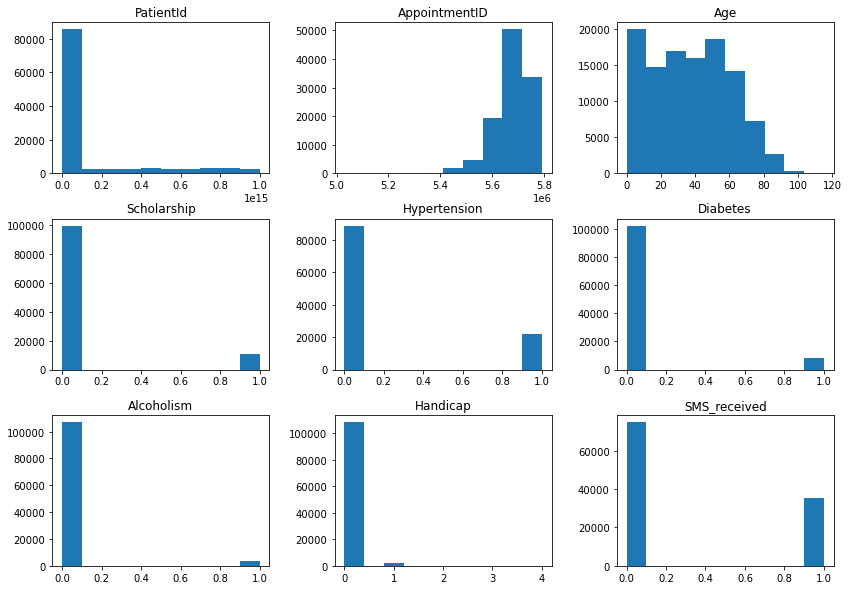

In [272]:
df.hist(figsize=(14,10), grid=False);

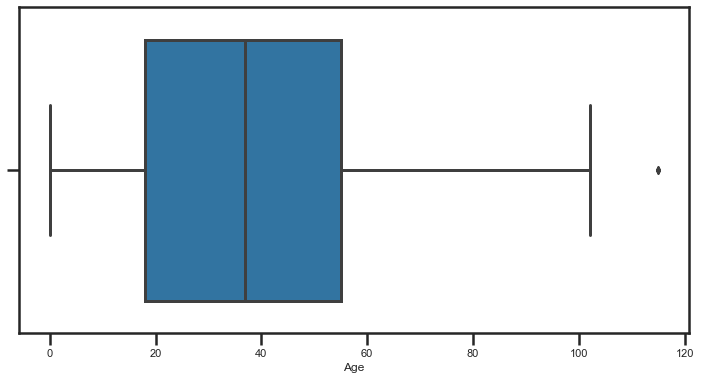

In [322]:
plt.figure(figsize=(12,6))
sns.boxplot(df["Age"]); 

From the above boxplot, there is an outlier in age column, which is the 115years old (odd but realistic)

Note: I chose to make a boxplot of age as it is the only interger of which meaning insights can be drawn. some other columns are more suited as an object column but i will leave them as they are. Also i will not be dropping the obvious outlier as it is not far-fetched.

In [273]:
df.Gender.value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [274]:
df.Scholarship.value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

In [275]:
df.No_show.value_counts()

No     88207
Yes    22319
Name: No_show, dtype: int64

In [276]:
df.Hypertension.value_counts()

0    88725
1    21801
Name: Hypertension, dtype: int64

In [277]:
df.Diabetes.value_counts()

0    102583
1      7943
Name: Diabetes, dtype: int64

In [278]:
df.Alcoholism.value_counts()

0    107166
1      3360
Name: Alcoholism, dtype: int64

In [279]:
df.SMS_received.value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64



### Research Question 1 (Are there more females on the scholarship compared to males?)

In [280]:
df["Gender"] = df.Gender.map({"F":"Female", "M":"Male"})

The "map" method in the above cell helps to replace "F" values in the Gender column with "Female" and "M" values with "Male" while assigning the appropriate datatype to the values. This just a neccesary for the plotting in the coming cells.

<AxesSubplot:>

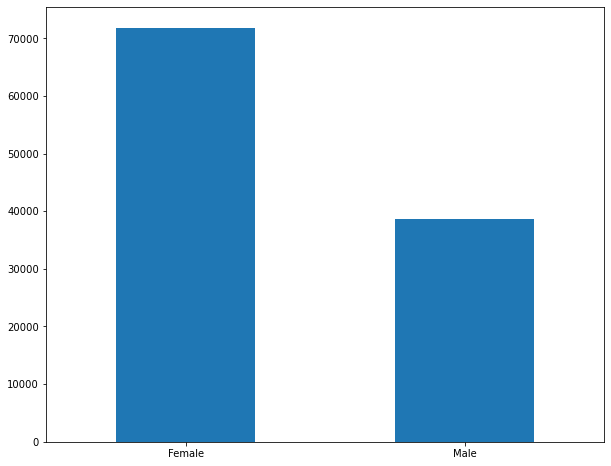

In [281]:
plt.figure(figsize=(10,8)) 
plot_gender = df.Gender.value_counts()
plot_gender.plot(kind="bar", rot = 0)

df.Gender.value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='Gender')

Above is a qucik plot to show the size of both genders in the dataset

In [282]:
male = len(df[(df["Gender"]=="Male") & (df["Scholarship"]==1)]) / len(df[df["Gender"]=="Male"])
male

0.05190374027451082

In [283]:
female = len(df[(df["Gender"]=="Female") & (df["Scholarship"]==1)]) / len(df[df["Gender"]=="Female"])
female

0.12323389802196578

Intuitively i guess there would be more females on the scholarship compared to males as the dataset entries has more females than male.
By proportion, only 5.1% of the males in the dataset are on the scholarship and roughly 12.3% of the females in the dataset are on the scholarship.
In the following cells, i will show a plot to visualize this.

In [284]:
def barplot(dataframe, x, y):
    plt.figure(figsize=(14,8))
    sns.barplot(data=dataframe, x=x, y=y)
    sns.despine()
    plt.xlabel(x, fontsize=20)
    plt.ylabel(y, fontsize=20)
    plt.tick_params(axis="both", which="major", labelsize=15)
    plt.show()

In the above cell is a custom plotting function for barplots.

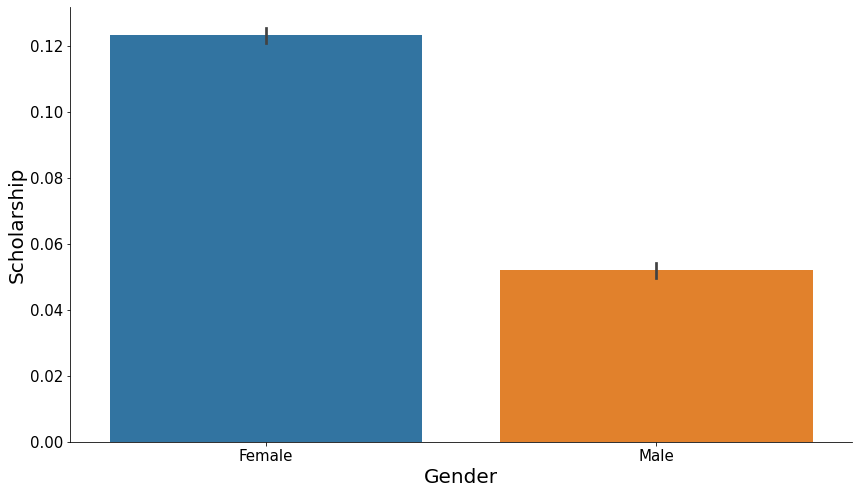

In [285]:
barplot(df, "Gender", "Scholarship")

By default, seaborn barplot computed the proportions for both gender.

### Research Question 2  (Is being on the scholarship a key predictor for patients showing up for appointments?)

In [286]:
df.groupby(["Scholarship","No_show"])["No_show"].size()

Scholarship  No_show
0            No         79924
             Yes        19741
1            No          8283
             Yes         2578
Name: No_show, dtype: int64

In the preceeding cells under EDA, we saw that most patients (about 99k+) in the dataset are not on the scholarship. For those on the scholarship, almost 77% (8283 out of 10861 people) of them showed up for the appointments, however for those not on the scholarship, about 80% of them showed up for the appointment.   

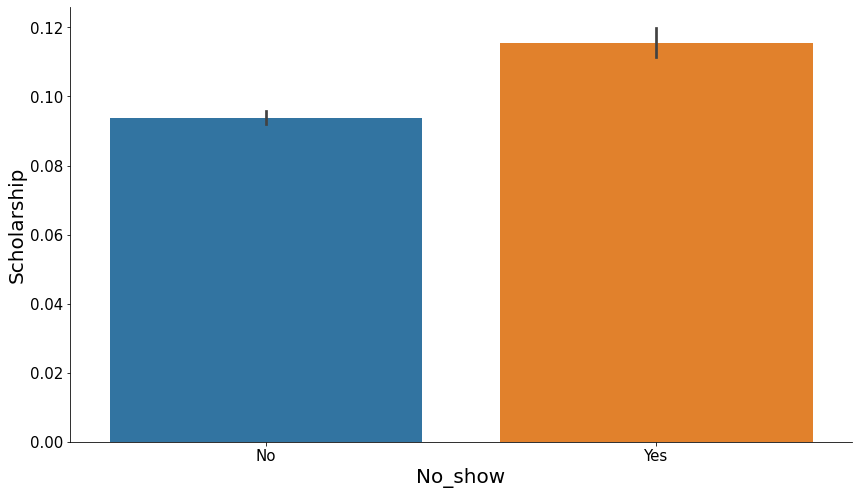

In [287]:
barplot(df, "No_show", "Scholarship")

The above plot shows that for everyone that showed up for the appointment, only 9% of them are on the scholarship which is expected as most patients in the dataset are not on the scholarship to begin with.
Also for those that did not show up for their appointments, about 11% of them are on the scholarship.

### Research Question 3  (Does a particlar gender turn up for appointment more than the other? by how much?)

In [288]:
df["No_show"] = df.No_show.map({"No":0, "Yes":1})

The "map" method in the above cell helps to replace "No" values in the No_show column with 0 and "Yes" values with 1 while assigning the appropriate datatype to the values. This just a neccesary for the plotting in the coming cells.

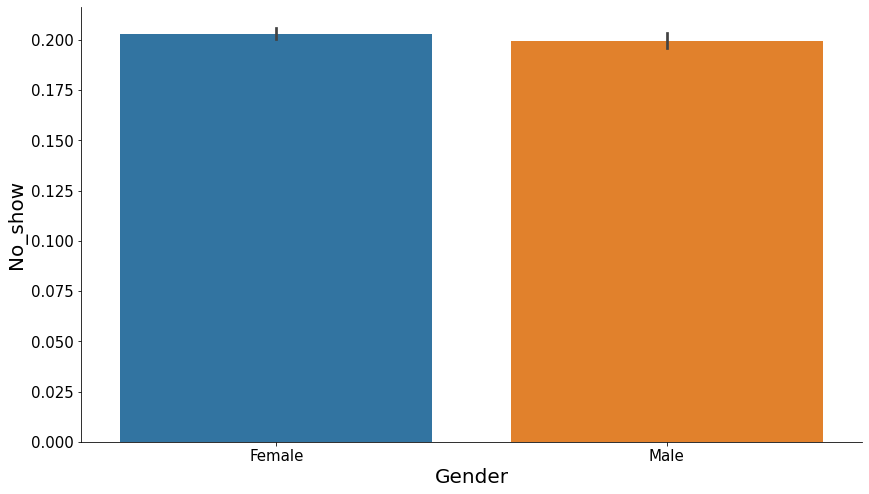

In [289]:
barplot(df, "Gender", "No_show")

The plot above shows that of all the female patients in the dataset, about 20% did not show up for their appointments and for all the male patients, about 19% did not show up for their appointment as well.

### Research Question 4  (Does a particular age demographic show up for appointment more compared to others)

In [290]:
df["Age_group"] = pd.cut(df.Age, np.arange(df.Age.min(), df.Age.max(), 10))


pandas "cut" method in the above cell helps to categorize (bin) the age column values into different age groups.

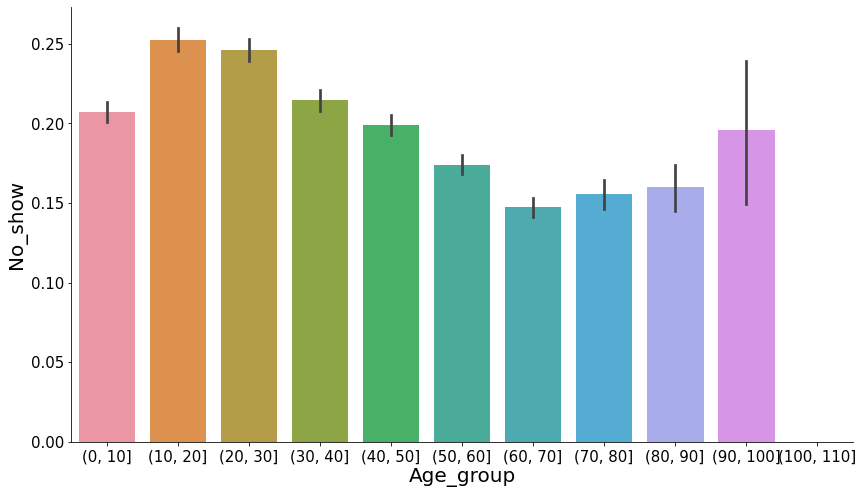

In [291]:
barplot(df, 'Age_group', "No_show")

From the above plot we can infer that only about 14% of age group [60-70] did not show up for their appointments implying that roughly 86% of patients that fall under this age group show up for their appointments.

### Research Question 5  (what age demographic have the most scholarship grant)

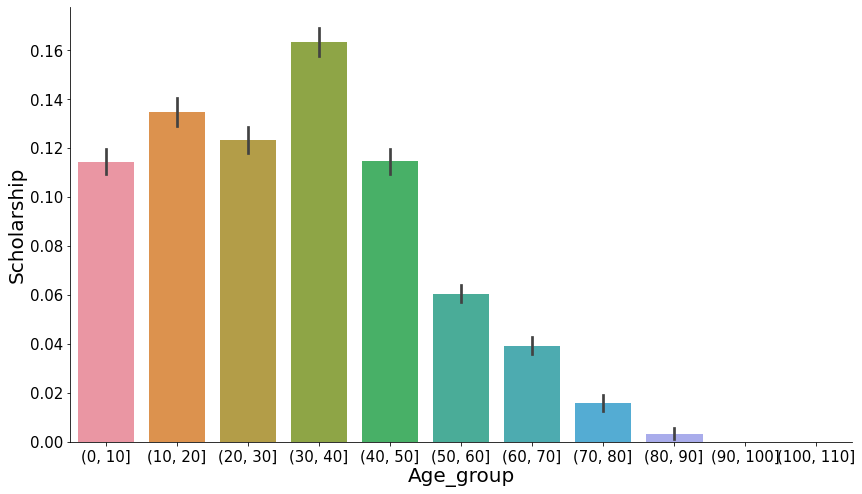

In [292]:
barplot(df, 'Age_group', "Scholarship")

It can be inferred from the plot above that about 16% (which is the highest) of patients that fall under age group [30-40] are on the scholarship.

### Research Question 6  (Are males more prone to health issues than females)

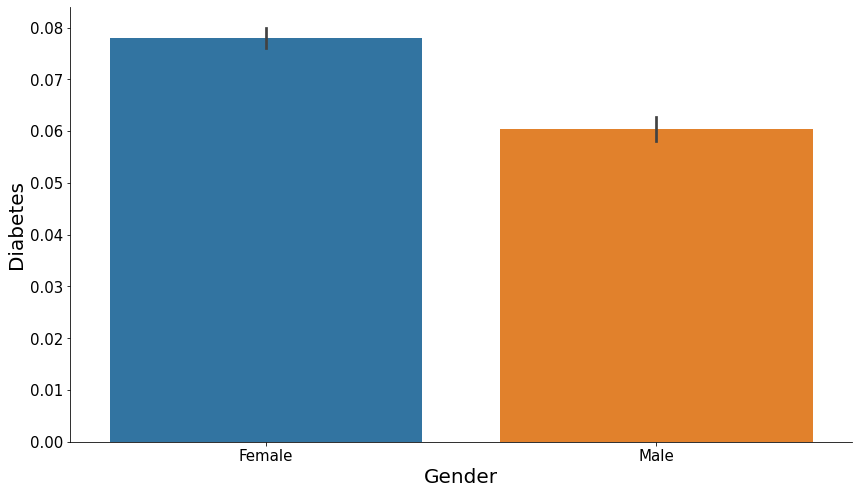

In [293]:
barplot(df, "Gender", "Diabetes")

The plot above implies that about 7.8% of female patients in the dataset are diabetic, while roughly 6% of male patients are diabetic

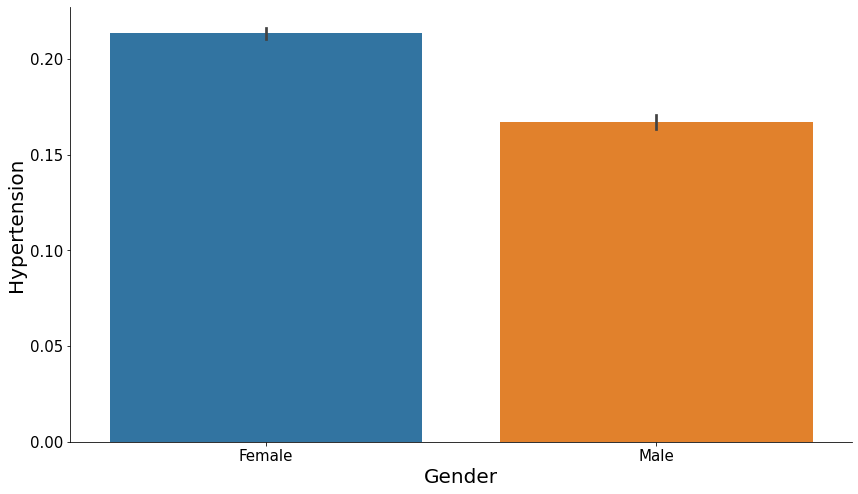

In [294]:
barplot(df, "Gender", "Hypertension")

The plot above implies that about 21% of female patients in the dataset are hypertensive, while 16% of male patients are hypertensive.

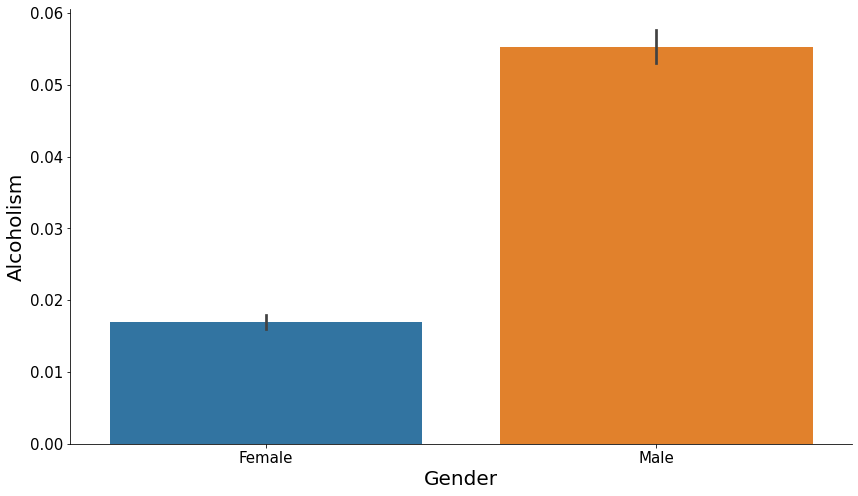

In [295]:
barplot(df, "Gender", "Alcoholism")

The plot above implies that about 1.5% of female patients in the dataset are alcoholic, while roughly 5.5% of male patients are alcoholic.

## Limitations

I could not use the handicap for my analysis as its description is quite different from its values. 
it stated a True or False type of entry which i assumed would be 0 or 1 like others but the unique values in the column are five (5) namely: 0, 1, 2, 3, and 4 with no proper description of what they stand for.

<a id='conclusions'></a>
## Conclusions

Inline with the first research question, I found that though the dataset had more of female patients than male, by proportion there are more female patients on the scholarship than male patients. 

Furthering my reserch into if being on the scholarship had an influence on patients showing up for their appointments or not, I found that most patients in the dataset are not on the scholarship to begin with and even those on the scholarship had a lesser turn up percentage (77%) compared to those not on the scholarship (80%). while the scholarship might influence those on it to show up for their appointments, in general it has a lesser influence and i would not consider it a key predictor of patients showing up.

On the third research question, i found that gender contribute no effect to a patient showing up as both genders in the dataset had fairly equal proportion in terms of numbers that did not show up for their appointments (roughly 20%). 

This brings me to the fourth research question, i found that a certain age group [60-70] showed up for their appointments more compared to others. Roughly 86% of patients that fall under said group showed up for their appointments and as such i would consider age a key predictor of patients showing up for their appointments.

By the fifth research question, i found that there are more patients on the scholarship in the age group [30-40] compared to others. About 16% of patients in the category are on the sholarship.

Down to the final research question, i found that according to the dataset, females have more health issues than males and it was a no brainer to see that there are more alcoholic males than females.

In addition, we could explore some health issues such as diabetes, to see if they have any influence on patients showing up for thier appointments.
